In [224]:
!pip install lmfit
import lmfit as lm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.9/98.9 kB 2.3 MB/s eta 0:00:00 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 4.9 MB/s eta 0:00:00


In [216]:
import pandas as pd
import matplotlib.pyplot as plt


In [9]:
df = pd.read_csv("data/car_table1a.csv", low_memory=False)

In [157]:
def plot_xy(df, x, y):   
    x_axis = df[x]
    y_axis = df[y]
    
    plt.plot(x_axis, y_axis, 'o')
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(f'{y} vs {x}')
    plt.legend([y])
    plt.grid(True)
    plt.show()

In [11]:
df.head()

,tbl,Year,quarter,citymarketid_1,citymarketid_2,city1,city2,airportid_1,airportid_2,airport_1,...,fare,carrier_lg,large_ms,fare_lg,carrier_low,lf_ms,fare_low,Geocoded_City1,Geocoded_City2,tbl1apk
0,Table1a,2021,3,30135,33195,"Allentown/Bethlehem/Easton, PA","Tampa, FL (Metropolitan Area)",10135,14112,ABE,...,81.43,G4,1.0000,81.43,G4,1.0000,81.43,NaN,NaN,202131013514112ABEPIE
1,Table1a,2021,3,30135,33195,"Allentown/Bethlehem/Easton, PA","Tampa, FL (Metropolitan Area)",10135,15304,ABE,...,208.93,DL,0.4659,219.98,UA,0.1193,154.11,NaN,NaN,202131013515304ABETPA
2,Table1a,2021,3,30140,30194,"Albuquerque, NM","Dallas/Fort Worth, TX",10140,11259,ABQ,...,184.56,WN,0.9968,184.44,WN,0.9968,184.44,NaN,NaN,202131014011259ABQDAL
3,Table1a,2021,3,30140,30194,"Albuquerque, NM","Dallas/Fort Worth, TX",10140,11298,ABQ,...,182.64,AA,0.9774,183.09,AA,0.9774,183.09,NaN,NaN,202131014011298ABQDFW
4,Table1a,2021,3,30140,30466,"Albuquerque, NM","Phoenix, AZ",10140,14107,ABQ,...,177.11,WN,0.6061,184.49,AA,0.3939,165.77,NaN,NaN,202131014014107ABQPHX


In [15]:
df.columns

Index(['tbl', 'Year', 'quarter', 'citymarketid_1', 'citymarketid_2', 'city1',
       'city2', 'airportid_1', 'airportid_2', 'airport_1', 'airport_2',
       'nsmiles', 'passengers', 'fare', 'carrier_lg', 'large_ms', 'fare_lg',
       'carrier_low', 'lf_ms', 'fare_low', 'Geocoded_City1', 'Geocoded_City2',
       'tbl1apk'],
      dtype='object')

In [43]:
filtered_df = df[['Year','quarter','city1',
       'city2','nsmiles','passengers','carrier_lg','carrier_low','lf_ms','fare','fare_lg','fare_low']]
filtered_df.head()

,Year,quarter,city1,city2,nsmiles,passengers,carrier_lg,carrier_low,lf_ms,fare,fare_lg,fare_low
0,2021,3,"Allentown/Bethlehem/Easton, PA","Tampa, FL (Metropolitan Area)",970,180,G4,G4,1.0000,81.43,81.43,81.43
1,2021,3,"Allentown/Bethlehem/Easton, PA","Tampa, FL (Metropolitan Area)",970,19,DL,UA,0.1193,208.93,219.98,154.11
2,2021,3,"Albuquerque, NM","Dallas/Fort Worth, TX",580,204,WN,WN,0.9968,184.56,184.44,184.44
3,2021,3,"Albuquerque, NM","Dallas/Fort Worth, TX",580,264,AA,AA,0.9774,182.64,183.09,183.09
4,2021,3,"Albuquerque, NM","Phoenix, AZ",328,398,WN,AA,0.3939,177.11,184.49,165.77


In [252]:
df['city1'].value_counts().head(20)

city1
Los Angeles, CA (Metropolitan Area)      26055
Boston, MA (Metropolitan Area)           23433
New York City, NY (Metropolitan Area)    23175
Chicago, IL                              18430
Dallas/Fort Worth, TX                    14905
Houston, TX                              13669
Cleveland, OH (Metropolitan Area)         9089
Miami, FL (Metropolitan Area)             8180
Atlanta, GA (Metropolitan Area)           4227
Detroit, MI                               3897
Austin, TX                                3596
Columbus, OH                              3509
Charlotte, NC                             3503
San Francisco, CA (Metropolitan Area)     3345
Kansas City, MO                           3224
Albuquerque, NM                           3197
Denver, CO                                3046
Cincinnati, OH                            2988
Las Vegas, NV                             2848
Birmingham, AL                            2773
Name: count, dtype: int64

In [27]:
df['city2'].value_counts()

city2
New York City, NY (Metropolitan Area)    36913
Washington, DC (Metropolitan Area)       31623
San Francisco, CA (Metropolitan Area)    22096
Los Angeles, CA (Metropolitan Area)      21475
Tampa, FL (Metropolitan Area)             9267
                                         ...  
Montrose/Delta, CO                           2
Vero Beach, FL                               2
Sanford, FL                                  1
Fort Wayne, IN                               1
St. Cloud, MN                                1
Name: count, Length: 128, dtype: int64

In [39]:
df['carrier_lg'].unique()

array(['G4', 'DL', 'WN', 'AA', 'UA', 'B6', 'AS', 'F9', 'NK', 'SY', '3M',
       'MX', nan, 'XP', 'US', 'HP', 'CO', 'YX', 'FL', 'NW', 'TW', 'RU',
       'DH', 'J7', 'TZ', 'JI', 'RP', 'P9', 'U5', 'N7', 'NJ', 'QQ', 'WV',
       'VX', 'KW', 'KP', 'ZW', 'UK', 'W7', 'HQ', 'FF', 'TB', 'LC', 'YY',
       'PA', 'YV', '5J', 'KN', '9K', 'E9', 'PN', 'BF', '9N', 'U2', 'OE',
       'W9', 'ZV', 'RL', 'T3', 'OP', 'OO', 'AQ', 'QX', 'OH', 'KS', 'XJ',
       'ZA', 'SX'], dtype=object)

In [53]:
filtered_df = filtered_df.rename(columns={'city1':'Departure City',
       'city2':'Arrival City','nsmiles':'Distance Nautical Miles','passengers':'Number of Passengers','carrier_lg':'Top Mkt Share Carrier','carrier_low':'Lowest Fare Carrier','lf_ms':'Lowest Mkt Share Carrier','fare':'Average Fare','fare_lg':'TMSC Fare','fare_low':'Lowest Fare'})

In [73]:
la_ny_df = filtered_df[(filtered_df['Departure City'] == 'Los Angeles, CA (Metropolitan Area)') & (filtered_df['Arrival City'] == 'New York City, NY (Metropolitan Area)')]
la_ny_df = la_ny_df.reset_index(drop=True)
la_ny_df

,Year,quarter,Departure City,Arrival City,Distance Nautical Miles,Number of Passengers,Top Mkt Share Carrier,Lowest Fare Carrier,Lowest Mkt Share Carrier,Average Fare,TMSC Fare,Lowest Fare
0,2021,3,"Los Angeles, CA (Metropolitan Area)","New York City, NY (Metropolitan Area)",2510,22,AA,AA,0.5777,259.74,264.34,264.34
1,2021,3,"Los Angeles, CA (Metropolitan Area)","New York City, NY (Metropolitan Area)",2510,1,AA,AA,0.7143,428.86,318.40,318.40
2,2021,3,"Los Angeles, CA (Metropolitan Area)","New York City, NY (Metropolitan Area)",2510,1,WN,WN,0.8333,224.17,221.80,221.80
3,2021,3,"Los Angeles, CA (Metropolitan Area)","New York City, NY (Metropolitan Area)",2510,331,B6,B6,0.9301,240.09,239.31,239.31
4,2021,3,"Los Angeles, CA (Metropolitan Area)","New York City, NY (Metropolitan Area)",2510,25,WN,WN,0.6300,250.95,247.45,247.45
...,...,...,...,...,...,...,...,...,...,...,...,...
3216,2024,1,"Los Angeles, CA (Metropolitan Area)","New York City, NY (Metropolitan Area)",2510,609,UA,AA,0.0540,379.93,384.87,292.66
3217,2024,1,"Los Angeles, CA (Metropolitan Area)","New York City, NY (Metropolitan Area)",2510,8,AA,AA,0.5634,367.55,339.20,339.20
3218,2024,1,"Los Angeles, CA (Metropolitan Area)","New York City, NY (Metropolitan Area)",2510,0,WN,WN,1.0000,215.00,215.00,215.00
3219,2024,1,"Los Angeles, CA (Metropolitan Area)","New York City, NY (Metropolitan Area)",2510,183,AA,AS,0.0138,482.02,490.00,280.70


In [75]:
la_ny_df['Top Mkt Share Carrier'].value_counts()

Top Mkt Share Carrier
AA    1081
UA     461
DL     361
WN     349
US     287
B6     225
HP     176
CO     160
TZ      25
F9      16
NW       9
TW       5
FL       4
MX       3
Name: count, dtype: int64

In [187]:
aa_la_ny_df = la_ny_df[la_ny_df['Top Mkt Share Carrier'] == 'AA'].reset_index(drop=True)
aa_la_ny_df['Year_Quarter'] = aa_la_ny_df['Year'].astype(str) + ' Q' + aa_la_ny_df['quarter'].astype(str)
aa_la_ny_df

,Year,quarter,Departure City,Arrival City,Distance Nautical Miles,Number of Passengers,Top Mkt Share Carrier,Lowest Fare Carrier,Lowest Mkt Share Carrier,Average Fare,TMSC Fare,Lowest Fare,Year_Quarter
0,2021,3,"Los Angeles, CA (Metropolitan Area)","New York City, NY (Metropolitan Area)",2510,22,AA,AA,0.5777,259.74,264.34,264.34,2021 Q3
1,2021,3,"Los Angeles, CA (Metropolitan Area)","New York City, NY (Metropolitan Area)",2510,1,AA,AA,0.7143,428.86,318.40,318.40,2021 Q3
2,2021,3,"Los Angeles, CA (Metropolitan Area)","New York City, NY (Metropolitan Area)",2510,22,AA,DL,0.2621,311.95,306.92,294.11,2021 Q3
3,2021,3,"Los Angeles, CA (Metropolitan Area)","New York City, NY (Metropolitan Area)",2510,338,AA,NK,0.2170,246.41,233.74,140.15,2021 Q3
4,2021,3,"Los Angeles, CA (Metropolitan Area)","New York City, NY (Metropolitan Area)",2510,2,AA,AA,1.0000,327.13,327.13,327.13,2021 Q3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1076,2024,1,"Los Angeles, CA (Metropolitan Area)","New York City, NY (Metropolitan Area)",2510,4,AA,DL,0.4359,230.72,227.94,223.22,2024 Q1
1077,2024,1,"Los Angeles, CA (Metropolitan Area)","New York City, NY (Metropolitan Area)",2510,146,AA,AA,0.4962,200.42,192.10,192.10,2024 Q1
1078,2024,1,"Los Angeles, CA (Metropolitan Area)","New York City, NY (Metropolitan Area)",2510,8,AA,AA,0.5634,367.55,339.20,339.20,2024 Q1
1079,2024,1,"Los Angeles, CA (Metropolitan Area)","New York City, NY (Metropolitan Area)",2510,183,AA,AS,0.0138,482.02,490.00,280.70,2024 Q1


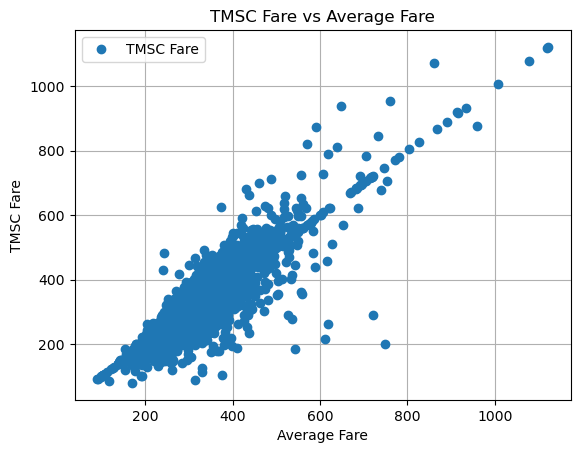

In [163]:
plot_xy(la_ny_df, 'Average Fare', 'TMSC Fare')

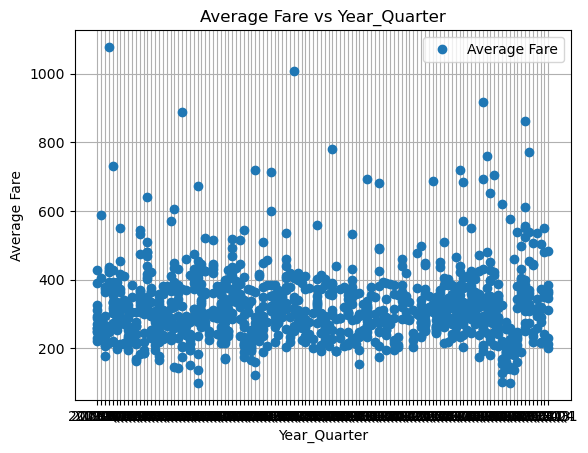

In [189]:
plot_xy(aa_la_ny_df, 'Year_Quarter', 'Average Fare')

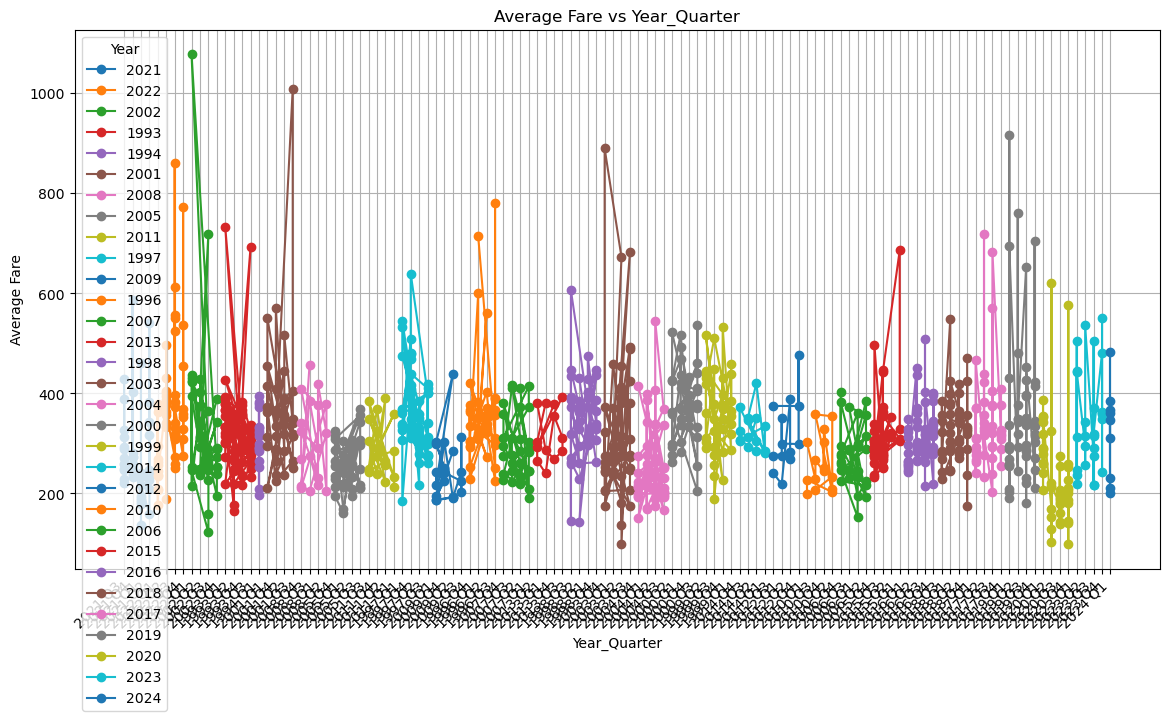

In [197]:
import matplotlib.pyplot as plt

def new_plot(df, x, y):
    # Set the figure size to make the plot wider
    plt.figure(figsize=(14, 7))  # Adjust the width and height as needed
    
    # Extract the unique years
    years = df['Year'].unique()
    
    # Plot the data
    for year in years:
        year_df = df[df['Year'] == year]
        plt.plot(year_df[x], year_df[y], 'o-', label=f'{year}')
    
    # Add labels and title
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(f'{y} vs {x}')
    
    # Improve the x-axis by adding a grid and rotating the labels
    plt.xticks(rotation=45, ha='right')
    
    # Add a legend for each year
    plt.legend(title='Year', loc='upper left')
    
    # Add grid
    plt.grid(True)
    
    # Display the plot
    plt.show()

# Now you can call your function with your dataframe
new_plot(aa_la_ny_df, 'Year_Quarter', 'Average Fare')


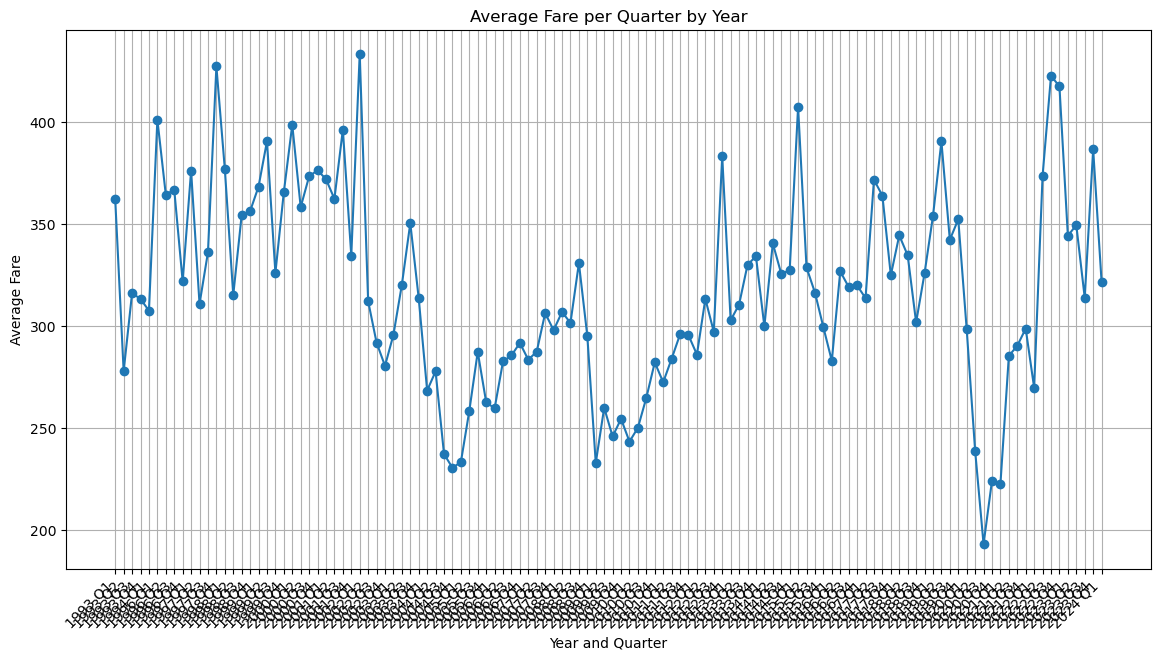

In [201]:
def create_avg_fare_df(df):
    # Group by Year and Quarter, then calculate the average fare
    avg_fare_df = df.groupby(['Year', 'quarter']).agg({'Average Fare': 'mean'}).reset_index()
    
    # Create a Year_Quarter column for easier plotting
    avg_fare_df['Year_Quarter'] = avg_fare_df['Year'].astype(str) + ' Q' + avg_fare_df['quarter'].astype(str)
    
    return avg_fare_df

# Step 2: Plot the data
def plot_avg_fare(df):
    # Set the figure size
    plt.figure(figsize=(14, 7))
    
    # Plot the data
    plt.plot(df['Year_Quarter'], df['Average Fare'], 'o-', label='Average Fare')
    
    # Add labels and title
    plt.xlabel('Year and Quarter')
    plt.ylabel('Average Fare')
    plt.title('Average Fare per Quarter by Year')
    
    # Improve the x-axis by rotating the labels
    plt.xticks(rotation=45, ha='right')
    
    # Add grid
    plt.grid(True)
    
    # Display the plot
    plt.show()

# Now you can create the new DataFrame and plot it
avg_fare_df = create_avg_fare_df(aa_la_ny_df)
plot_avg_fare(avg_fare_df)

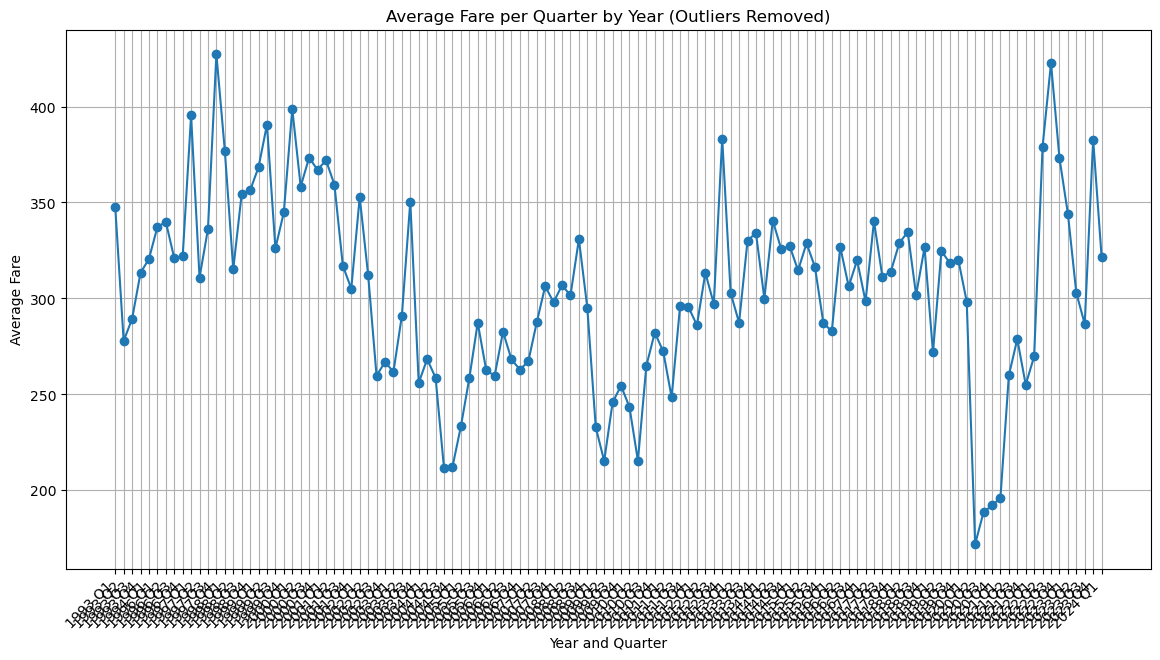

In [205]:


# Function to remove outliers using the IQR method
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    filtered_df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return filtered_df

# Step 1: Create the new DataFrame with outliers removed
def create_avg_fare_df_no_outliers(df):
    # Initialize an empty list to store the filtered data
    filtered_data = []
    
    # Group the data by Year and Quarter
    grouped = df.groupby(['Year', 'quarter'])
    
    # Remove outliers and calculate the mean for each group
    for name, group in grouped:
        group_no_outliers = remove_outliers(group, 'Average Fare')
        avg_fare = group_no_outliers['Average Fare'].mean()
        filtered_data.append({
            'Year': name[0],
            'quarter': name[1],
            'Average Fare': avg_fare
        })
    
    # Convert the list of dictionaries to a DataFrame
    avg_fare_df = pd.DataFrame(filtered_data)
    
    # Create a Year_Quarter column for easier plotting
    avg_fare_df['Year_Quarter'] = avg_fare_df['Year'].astype(str) + ' Q' + avg_fare_df['quarter'].astype(str)
    
    return avg_fare_df

# Step 2: Plot the data (using the same plot function as before)
def plot_avg_fare(df):
    # Set the figure size
    plt.figure(figsize=(14, 7))
    
    # Plot the data
    plt.plot(df['Year_Quarter'], df['Average Fare'], 'o-', label='Average Fare')
    
    # Add labels and title
    plt.xlabel('Year and Quarter')
    plt.ylabel('Average Fare')
    plt.title('Average Fare per Quarter by Year (Outliers Removed)')
    
    # Improve the x-axis by rotating the labels
    plt.xticks(rotation=45, ha='right')
    
    # Add grid
    plt.grid(True)
    
    # Display the plot
    plt.show()

# Now you can create the new DataFrame and plot it
avg_fare_df_no_outliers = create_avg_fare_df_no_outliers(aa_la_ny_df)
plot_avg_fare(avg_fare_df_no_outliers)


In [230]:
file_path = 'data/avg_fare_no_outliers.csv'
avg_fare_df_no_outliers.to_csv(file_path, index=False)

In [236]:
df['city1'].unique()

array(['Allentown/Bethlehem/Easton, PA', 'Albuquerque, NM',
       'Nantucket, MA', 'Colorado Springs, CO', 'Dallas/Fort Worth, TX',
       'Pittsburgh, PA', 'Huntsville, AL', 'Albany, NY', 'Amarillo, TX',
       'Denver, CO', 'Atlanta, GA (Metropolitan Area)', 'Austin, TX',
       'Asheville, NC', 'Tucson, AZ', 'Phoenix, AZ', 'Hartford, CT',
       'Seattle, WA', 'Birmingham, AL', 'El Paso, TX',
       'Cleveland, OH (Metropolitan Area)', 'Nashville, TN', 'Boise, ID',
       'Boston, MA (Metropolitan Area)', 'Burlington, VT', 'Buffalo, NY',
       'Bozeman, MT', 'Washington, DC (Metropolitan Area)', 'Chicago, IL',
       'Charleston, SC', 'Cedar Rapids/Iowa City, IA', 'Charlotte, NC',
       'Columbus, OH', 'St. Louis, MO', 'Myrtle Beach, SC',
       'Jacksonville, FL', 'Detroit, MI', 'Des Moines, IA', 'Houston, TX',
       'Orlando, FL', 'Panama City, FL', 'Valparaiso, FL', 'Eugene, OR',
       'Key West, FL', 'Fargo, ND', 'Kalispell, MT',
       'Minneapolis/St. Paul, MN',
       'N

In [262]:
nm_dep_df = filtered_df[(filtered_df['Departure City'] == 'Albuquerque, NM')]
nm_dep_df = nm_dep_df.reset_index(drop=True)
# nm_dep_df['Arrival City'].value_counts()
nm_dep_df

,Year,quarter,Departure City,Arrival City,Distance Nautical Miles,Number of Passengers,Top Mkt Share Carrier,Lowest Fare Carrier,Lowest Mkt Share Carrier,Average Fare,TMSC Fare,Lowest Fare
0,2021,3,"Albuquerque, NM","Dallas/Fort Worth, TX",580,204,WN,WN,0.9968,184.56,184.44,184.44
1,2021,3,"Albuquerque, NM","Dallas/Fort Worth, TX",580,264,AA,AA,0.9774,182.64,183.09,183.09
2,2021,3,"Albuquerque, NM","Phoenix, AZ",328,398,WN,AA,0.3939,177.11,184.49,165.77
3,2021,3,"Albuquerque, NM","Boston, MA (Metropolitan Area)",1974,153,AA,WN,0.1609,324.97,323.73,298.20
4,2021,3,"Albuquerque, NM","Boston, MA (Metropolitan Area)",1974,16,WN,WN,0.7285,315.90,270.42,270.42
...,...,...,...,...,...,...,...,...,...,...,...,...
3192,2024,1,"Albuquerque, NM","Los Angeles, CA (Metropolitan Area)",677,117,WN,NK,0.0197,209.01,207.55,110.67
3193,2024,1,"Albuquerque, NM","Los Angeles, CA (Metropolitan Area)",677,427,WN,WN,0.3679,222.09,182.34,182.34
3194,2024,1,"Albuquerque, NM","Los Angeles, CA (Metropolitan Area)",677,102,WN,WN,0.9978,174.17,173.81,173.81
3195,2024,1,"Albuquerque, NM","Los Angeles, CA (Metropolitan Area)",677,50,WN,WN,0.7342,259.47,251.87,251.87


In [286]:
pre2001 = nm_dep_df[(nm_dep_df['Year'] <= 2000)].reset_index(drop=True)
pre2001 = pre2001.sort_values(by = ['Year','quarter'])
pre2001['Year_Quarter'] = pre2001['Year'].astype(str) + ' Q' + pre2001['quarter'].astype(str)

pre2001

,Year,quarter,Departure City,Arrival City,Distance Nautical Miles,Number of Passengers,Top Mkt Share Carrier,Lowest Fare Carrier,Lowest Mkt Share Carrier,Average Fare,TMSC Fare,Lowest Fare,Year_Quarter
14,1993,1,"Albuquerque, NM","Washington, DC (Metropolitan Area)",1670,110,UA,NW,0.22,256.00,274.43,184.06,1993 Q1
18,1993,1,"Albuquerque, NM","New York City, NY (Metropolitan Area)",1861,28,TW,AA,0.22,253.22,231.68,218.67,1993 Q1
23,1993,1,"Albuquerque, NM","Chicago, IL",1123,57,WN,WN,0.83,139.36,137.87,137.87,1993 Q1
28,1993,1,"Albuquerque, NM","Boston, MA (Metropolitan Area)",1974,124,AA,AA,0.24,281.67,260.36,260.36,1993 Q1
75,1993,1,"Albuquerque, NM","Chicago, IL",1123,153,AA,AA,0.76,247.37,245.94,245.94,1993 Q1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
517,2000,4,"Albuquerque, NM","Chicago, IL",1121,286,AA,AA,0.64,194.72,197.24,197.24,2000 Q4
534,2000,4,"Albuquerque, NM","Los Angeles, CA (Metropolitan Area)",677,805,WN,HP,0.07,130.79,131.74,104.27,2000 Q4
537,2000,4,"Albuquerque, NM","Kansas City, MO",718,178,WN,TW,0.03,149.57,149.35,128.21,2000 Q4
605,2000,4,"Albuquerque, NM","Washington, DC (Metropolitan Area)",1670,102,UA,TW,0.12,241.23,237.05,222.62,2000 Q4


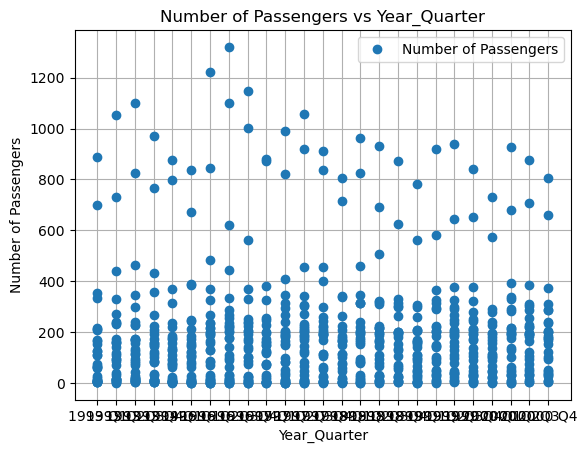

In [290]:
plot_xy(pre2001, 'Year_Quarter', 'Number of Passengers')

In [312]:
def create_test_df(df):
    # Group by Year and Quarter, then calculate the average fare
    new_test_df = df.groupby(['Year', 'quarter']).agg({'Average Fare': 'mean'}).reset_index()
    
    
    # Create a Year_Quarter column for easier plotting
    new_test_df['Year_Quarter'] = new_test_df['Year'].astype(str) + ' Q' + new_test_df['quarter'].astype(str)
    
    return new_test_df

In [320]:
new_test_df = create_test_df(pre2001)

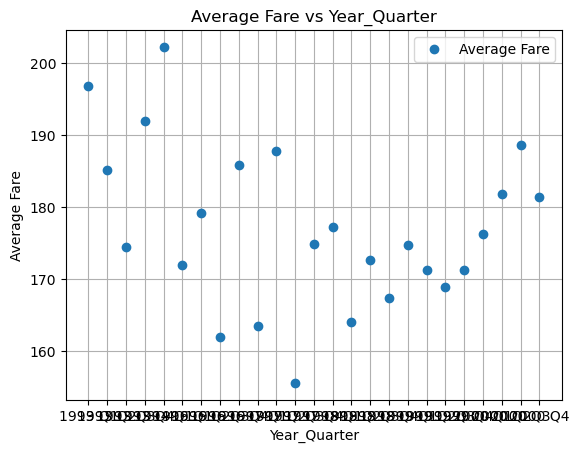

In [322]:
plot_xy(new_test_df, 'Year_Quarter', 'Average Fare')

In [332]:
fare_dist = filtered_df.sort_values(by = ['Year','quarter','Distance Nautical Miles','Lowest Fare']).reset_index(drop=True)
fare_dist 

,Year,quarter,Departure City,Arrival City,Distance Nautical Miles,Number of Passengers,Top Mkt Share Carrier,Lowest Fare Carrier,Lowest Mkt Share Carrier,Average Fare,TMSC Fare,Lowest Fare
0,1993,1,"Los Angeles, CA (Metropolitan Area)","San Diego, CA",122,325,AA,AS,0.1300,87.99,87.35,82.35
1,1993,1,"Los Angeles, CA (Metropolitan Area)","San Diego, CA",122,2,DL,DL,0.6400,108.17,109.02,109.02
2,1993,1,"Los Angeles, CA (Metropolitan Area)","San Diego, CA",122,1,AA,US,0.3300,122.68,120.00,117.40
3,1993,1,"Los Angeles, CA (Metropolitan Area)","San Diego, CA",122,2,DL,DL,0.6600,122.05,117.49,117.49
4,1993,1,"Cleveland, OH (Metropolitan Area)","Detroit, MI",133,24,NW,US,0.0200,169.82,170.47,150.83
...,...,...,...,...,...,...,...,...,...,...,...,...
245950,2024,1,"Boston, MA (Metropolitan Area)","San Francisco, CA (Metropolitan Area)",2704,34,AA,AA,0.4839,385.10,328.87,328.87
245951,2024,1,"Boston, MA (Metropolitan Area)","San Francisco, CA (Metropolitan Area)",2704,1,WN,WN,0.4615,492.87,411.00,411.00
245952,2024,1,"Boston, MA (Metropolitan Area)","San Francisco, CA (Metropolitan Area)",2704,3,AA,AA,0.7097,495.19,440.45,440.45
245953,2024,1,"Miami, FL (Metropolitan Area)","Seattle, WA",2724,599,AS,AS,0.5326,312.56,286.91,286.91


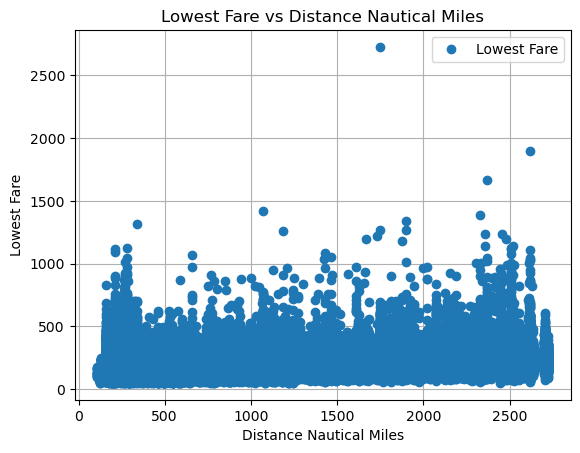

In [338]:
plot_xy(fare_dist, 'Distance Nautical Miles', 'Lowest Fare')

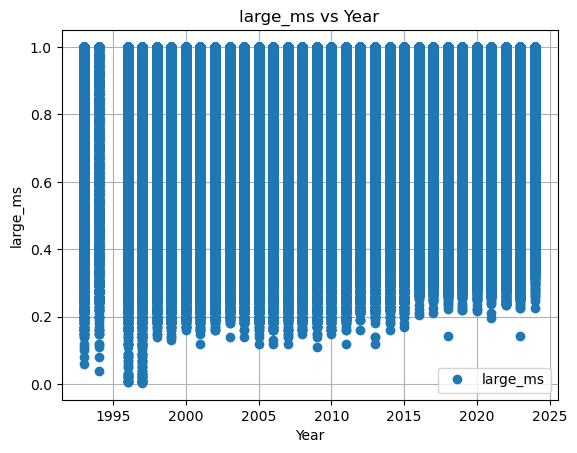

In [346]:
plot_xy(df, 'Year', 'large_ms')

In [348]:
filtered_df

,Year,quarter,Departure City,Arrival City,Distance Nautical Miles,Number of Passengers,Top Mkt Share Carrier,Lowest Fare Carrier,Lowest Mkt Share Carrier,Average Fare,TMSC Fare,Lowest Fare
0,2021,3,"Allentown/Bethlehem/Easton, PA","Tampa, FL (Metropolitan Area)",970,180,G4,G4,1.0000,81.43,81.43,81.43
1,2021,3,"Allentown/Bethlehem/Easton, PA","Tampa, FL (Metropolitan Area)",970,19,DL,UA,0.1193,208.93,219.98,154.11
2,2021,3,"Albuquerque, NM","Dallas/Fort Worth, TX",580,204,WN,WN,0.9968,184.56,184.44,184.44
3,2021,3,"Albuquerque, NM","Dallas/Fort Worth, TX",580,264,AA,AA,0.9774,182.64,183.09,183.09
4,2021,3,"Albuquerque, NM","Phoenix, AZ",328,398,WN,AA,0.3939,177.11,184.49,165.77
...,...,...,...,...,...,...,...,...,...,...,...,...
245950,2024,1,"Knoxville, TN","New York City, NY (Metropolitan Area)",665,207,DL,AA,0.2359,278.70,287.44,248.46
245951,2024,1,"Knoxville, TN","Miami, FL (Metropolitan Area)",724,277,G4,G4,0.8255,148.69,114.45,114.45
245952,2024,1,"Knoxville, TN","Miami, FL (Metropolitan Area)",724,70,AA,AA,0.8057,330.19,321.92,321.92
245953,2024,1,"Knoxville, TN","Tampa, FL (Metropolitan Area)",550,178,G4,G4,1.0000,95.65,95.65,95.65


In [362]:
def create_median_df(df):
    # Group by Year and Quarter, then calculate the average fare
    new_test_df = df.groupby(['Year', 'quarter', 'Distance Nautical Miles']).agg({'Average Fare': 'median'}).reset_index()
    
    
    # Create a Year_Quarter column for easier plotting
    new_test_df['Year_Quarter'] = new_test_df['Year'].astype(str) + ' Q' + new_test_df['quarter'].astype(str)
    
    return new_test_df

In [364]:
median_fare_df = create_median_df(filtered_df)
median_fare_df

,Year,quarter,Distance Nautical Miles,Average Fare,Year_Quarter
0,1993,1,122,115.110,1993 Q1
1,1993,1,133,165.850,1993 Q1
2,1993,1,137,147.650,1993 Q1
3,1993,1,155,241.420,1993 Q1
4,1993,1,160,71.500,1993 Q1
...,...,...,...,...,...
62485,2024,1,2608,340.830,2024 Q1
62486,2024,1,2611,317.370,2024 Q1
62487,2024,1,2700,268.255,2024 Q1
62488,2024,1,2704,346.340,2024 Q1


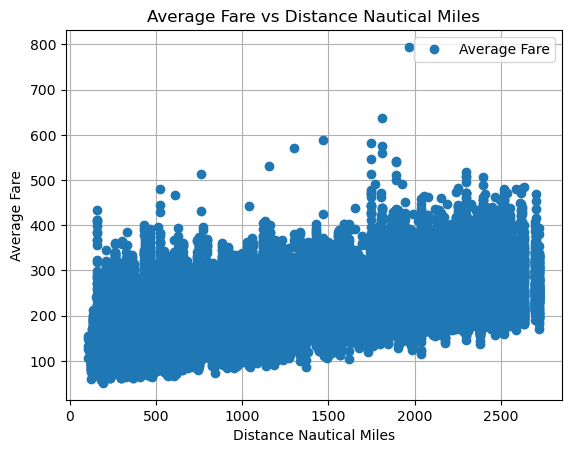

In [366]:
plot_xy(median_fare_df, 'Distance Nautical Miles','Average Fare')

In [370]:
route_counts = filtered_df.groupby(['Departure City', 'Arrival City']).size().reset_index(name='Count')

top_5_routes = route_counts.sort_values(by='Count', ascending=False).head(5)

print(top_5_routes)

                             Departure City  \
911     Los Angeles, CA (Metropolitan Area)   
1087  New York City, NY (Metropolitan Area)   
1102  New York City, NY (Metropolitan Area)   
944     Los Angeles, CA (Metropolitan Area)   
163          Boston, MA (Metropolitan Area)   

                               Arrival City  Count  
911   New York City, NY (Metropolitan Area)   3221  
1087  San Francisco, CA (Metropolitan Area)   2102  
1102     Washington, DC (Metropolitan Area)   1991  
944      Washington, DC (Metropolitan Area)   1818  
163     Los Angeles, CA (Metropolitan Area)   1705  


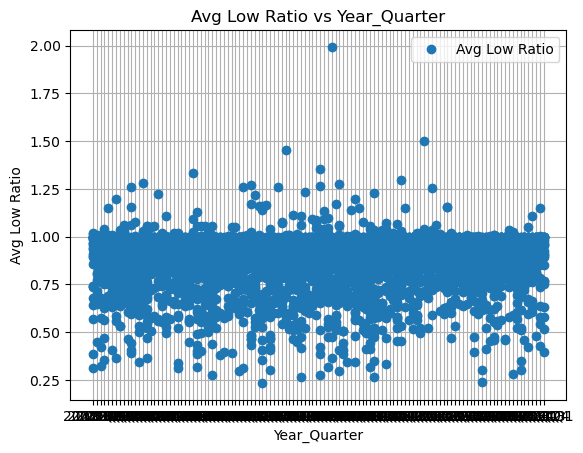

In [378]:
fare_over = filtered_df
fare_over['Avg Low Ratio'] = fare_over['Lowest Fare']/fare_over['Average Fare']
fare_over['Year_Quarter'] = fare_over['Year'].astype(str) + ' Q' + fare_over['quarter'].astype(str)
fare_over = fare_over[(fare_over['Departure City'] == 'Los Angeles, CA (Metropolitan Area)') & (fare_over['Arrival City'] == 'New York City, NY (Metropolitan Area)')]
fare_over = fare_over.reset_index(drop=True)

plot_xy(fare_over, 'Year_Quarter', 'Avg Low Ratio')